## FASTQ quality 시각화

/Users/kimjoonsu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimjoonsu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kimjoonsu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

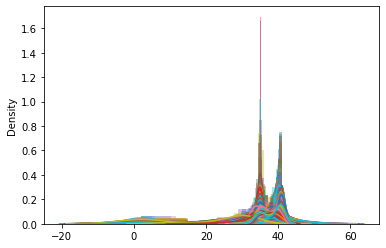

In [4]:
import seaborn as sns
from Bio import SeqIO, Entrez

records = SeqIO.parse('SRR1552444.fastq', 'fastq')
for i, record in enumerate(records):
    score = record.letter_annotations["phred_quality"]
    sns.distplot(score)

## FASTQ -> FASTA

In [2]:
from Bio import SeqIO
import numpy as np
import pandas as pd

SeqIO.convert('SRR049646.fastq', 'fastq-illumina', 'SRR049646.fasta', 'fasta')

8713

## FASTQ의 DataFrame화

In [20]:
#records = SeqIO.parse('SRR049646.fasta', 'fasta')
import re
records = SeqIO.parse('SRR049646.fastq', 'fastq')
for i, r in enumerate(records):
    if(i == 0):
        print(r.seq)
        print(type(r.seq))
       

TCAGCACGCCCGTCAATTCCTTTGAGTTTCACCGTTGCCGGCGTACTCCCCAGGTGGGATGCTTAATGCTTTCGCTTGGCCGCTGACCTATTCAGACCAACAGCGGGCATCCATCGTTTACCGTGCGGACTACCAGGGTATCTAATCCTGTTCGATACCCGCACTTTCGAGCTTCAGCGTCAGTTGCGCTCCAGTGAGCTGCCTTCGCAATCGGAGTTCTTCGTGATATCTAAGCATTTCACCGCTACACCACGAATTCCGCCCACTTTGTGCGTACTCAAGGCACACAGGGGATAGGN
<class 'Bio.Seq.Seq'>


In [5]:
from Bio import SeqIO, Entrez   #** [준수](2022.03.31_15:29) Seqence 읽기 모듈 SeqIO, NCBI에서 fastq 불러오는 Entrez 호출
import numpy as np  #[준수](2022.03.31_15:29) 행렬 계산을 위해 numpy 호출
import pandas as pd  #*** [준수](2022.03.31_15:29) 데이터프레임 구성을 위해 numpy 호출
import re  #** [준수](2022.03.31_15:29) fastq파일 헤더의 Quality 슬라이싱을 위해 정규화 모듈인 re 호출 
records = SeqIO.parse('SRR049646.fastq', 'fastq')
fastq_df = pd.DataFrame(columns = ['ID', 'Sequence', 'Quality', 'bp(bases per read)'])  #[준수](2022.03.31_15:29) 데이터를 넣기 전 먼저 데이터프레임 객체를 생성
for i, record in enumerate(records):
    fastq_df.loc[i] = [record.id, record.seq, record.letter_annotations["phred_quality"], re.sub(r'[^0-9]', '', record.description.split(' ')[2])]
    
fastq_df

,ID,Sequence,Quality,bp(bases per read)
0,SRR049646.1,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[40, 40, 40, 40, 40, 40, 40, 40, 34, 34, 34, 4...",299
1,SRR049646.2,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[40, 40, 40, 40, 40, 40, 40, 40, 21, 21, 21, 3...",557
2,SRR049646.3,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",564
3,SRR049646.4,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[37, 37, 37, 37, 37, 37, 37, 37, 21, 21, 21, 3...",621
4,SRR049646.5,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 4...",299
...,...,...,...,...
8708,SRR049646.8709,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[37, 37, 37, 37, 37, 32, 31, 32, 37, 31, 31, 3...",555
8709,SRR049646.8710,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 3...",637
8710,SRR049646.8711,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[37, 37, 37, 37, 37, 32, 31, 32, 37, 37, 37, 3...",834
8711,SRR049646.8712,"(T, C, A, G, C, A, C, G, C, C, C, G, T, C, A, ...","[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 3...",544


In [7]:
from Bio import SeqIO, Entrez
Entrez.email = 'nagabuti13@gmail.com'
handle = Entrez.efetch(db = 'sra', id = 'SRR049646', rettype = 'csv', retmode = 'text')
records = SeqIO.parse(handle, 'csv')
for i in records:
    print(i)